<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4:  Using Yelp cost estimates for estimating neighborhood affluency

<i>
                
                Submitted by Shannon Bingham and Roy Kim
</i>

 
## Problem Statement
This tool will estimate the affluence of a neighborhood based on the number of `$` of businesses and services (according to Yelp) in a given neighborhood. (`$`, `$$`, `$$$`, `$$$$`) This tool will expect to get, as an input, a list of zip codes or names of neighborhoods and will estimate the wealth of the locality. While traditional methods typically estimate wealth of a locality based on demographic characteristics (e.g. income or unemployment rate), the novelty of this approach is in its use of big data related to commercial activity and cost of product and services as an indicator for affluency.

## Notebook Description
_This notebook uses K-Means and DBSCAN to try to cluster data in an Unsupervised Model. The aim is to arrive at some insight or conclusion of affluence by zip code._

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('../data/composite_zip_WI.csv')

In [3]:
df.head()

,zipcode,n_business,n_d1,n_d2,n_d3,n_d4,n_review,n_s1,n_s1plus,n_s2,...,n_s_gourmet,p_s_gourmet,p_ge_s2_gourmet,p_ge_s2plus_gourmet,p_ge_s3_gourmet,p_ge_s3plus_gourmet,p_ge_s4_gourmet,p_ge_s4plus_gourmet,p_ge_s5_gourmet,score_s_gourmet
0,53004,64,26,37,0,1,1395,3,11,18,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
1,53006,8,5,3,0,0,123,0,8,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,53018,363,177,173,13,0,10591,30,156,243,...,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,2.5
3,53022,112,46,63,3,0,3469,0,40,291,...,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0,3.5
4,53024,228,94,127,6,1,7464,3,148,327,...,3,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0,10.5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Columns: 311 entries, zipcode to score_s_gourmet
dtypes: float64(122), int64(189)
memory usage: 233.3 KB


In [9]:
# Creating a function to graph scatter plots
def compare_scatter(df, list_of_features):
    fig,ax = plt.subplots(nrows = int(len(list_of_features)/2),
                             ncols = 2,
                             figsize = (18, int(7 * len(list_of_features)/2)))
    
    for i in range(len(list_of_features) - 1):
        for j in range(i+1, len(list_of_features)):
            ax[i].scatter(df[list_of_features[i]],df[list_of_features[j]])
            ax[i].set_title(f'{list_of_features[i]} vs. {list_of_features[j]}')
            ax[i].set_xlabel(list_of_features[i], color='r', fontsize=20)
            ax[i].set_ylabel(list_of_features[j], color='r', fontsize=20)
    
    plt.show()

In [10]:
# Creating a function for plotting clusters.
def compare_clusters(df, xcol, ycol,
                     n_clusters_kmeans = 3,  
                     eps_dbscan = .3, min_samples_dbscan = 5,
                     random_state = 42):
    
    X = df.loc[:,(xcol,ycol)]
    
    # Reference plot/subplot initialization
    fig,axarr = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 7))
        
    # KMeans
    kmeans = KMeans(n_clusters=n_clusters_kmeans)
    kmeans.fit(X)
    X['KMeans_label'] = kmeans.labels_
    
    colors = plt.cm.Spectral(np.linspace(0,1,len(X['KMeans_label'].unique())))
    
    # Set up first graph with initial data observations and correct labels
    for label, color in zip(X['KMeans_label'].unique(), colors):
        X_ = X[X['KMeans_label'] == label]
        axarr[0].scatter(X_.iloc[:,0],X_.iloc[:,1], s=80, 
                         color=color, label=label, alpha=0.9)
    
    axarr[0].set_title("KMeans Clustering", fontsize=30)
    axarr[0].legend(loc="lower right")
    axarr[0].set_xlabel(xcol, color='r', fontsize=20)
    axarr[0].set_ylabel(ycol, color='r', fontsize=20)
    
    # DBSCAN
    dbscan = DBSCAN(eps=eps_dbscan, min_samples=min_samples_dbscan)
    dbscan.fit(X)
    X['DBCSAN_label'] = dbscan.labels_
    
    colors = plt.cm.Spectral(np.linspace(0,1,len(X['DBCSAN_label'].unique())))
    
    # Set up first graph with initial data observations and correct labels
    for label, color in zip(X['DBCSAN_label'].unique(), colors):
        X_ = X[X['DBCSAN_label'] == label]
        axarr[1].scatter(X_.iloc[:,0],X_.iloc[:,1], s=80, 
                         color=color, label=label, alpha=0.9)
    
    axarr[1].set_title("DBCSAN", fontsize=30)
    axarr[1].legend(loc="lower right")
    axarr[1].set_xlabel(xcol, color='r', fontsize=20)
    axarr[1].set_ylabel(ycol, color='r', fontsize=20)
    plt.show()

According to the EDA, the features that had the highest correlation to AGI were the following: `n_d3_grocery`, `n_d3_gourmet`, `n_gourmet`, `n_d1_breweries`, `n_d2_grocery`. We can first graph a scatterplot between each pair of features to see if there are interesting clusters that might arise.

In [26]:
features_list = ['n_d3_grocery', 'n_d3_gourmet', 
                 'n_gourmet', 'n_d1_breweries', 'n_d2_grocery']

AttributeError: 'numpy.ndarray' object has no attribute 'scatter'

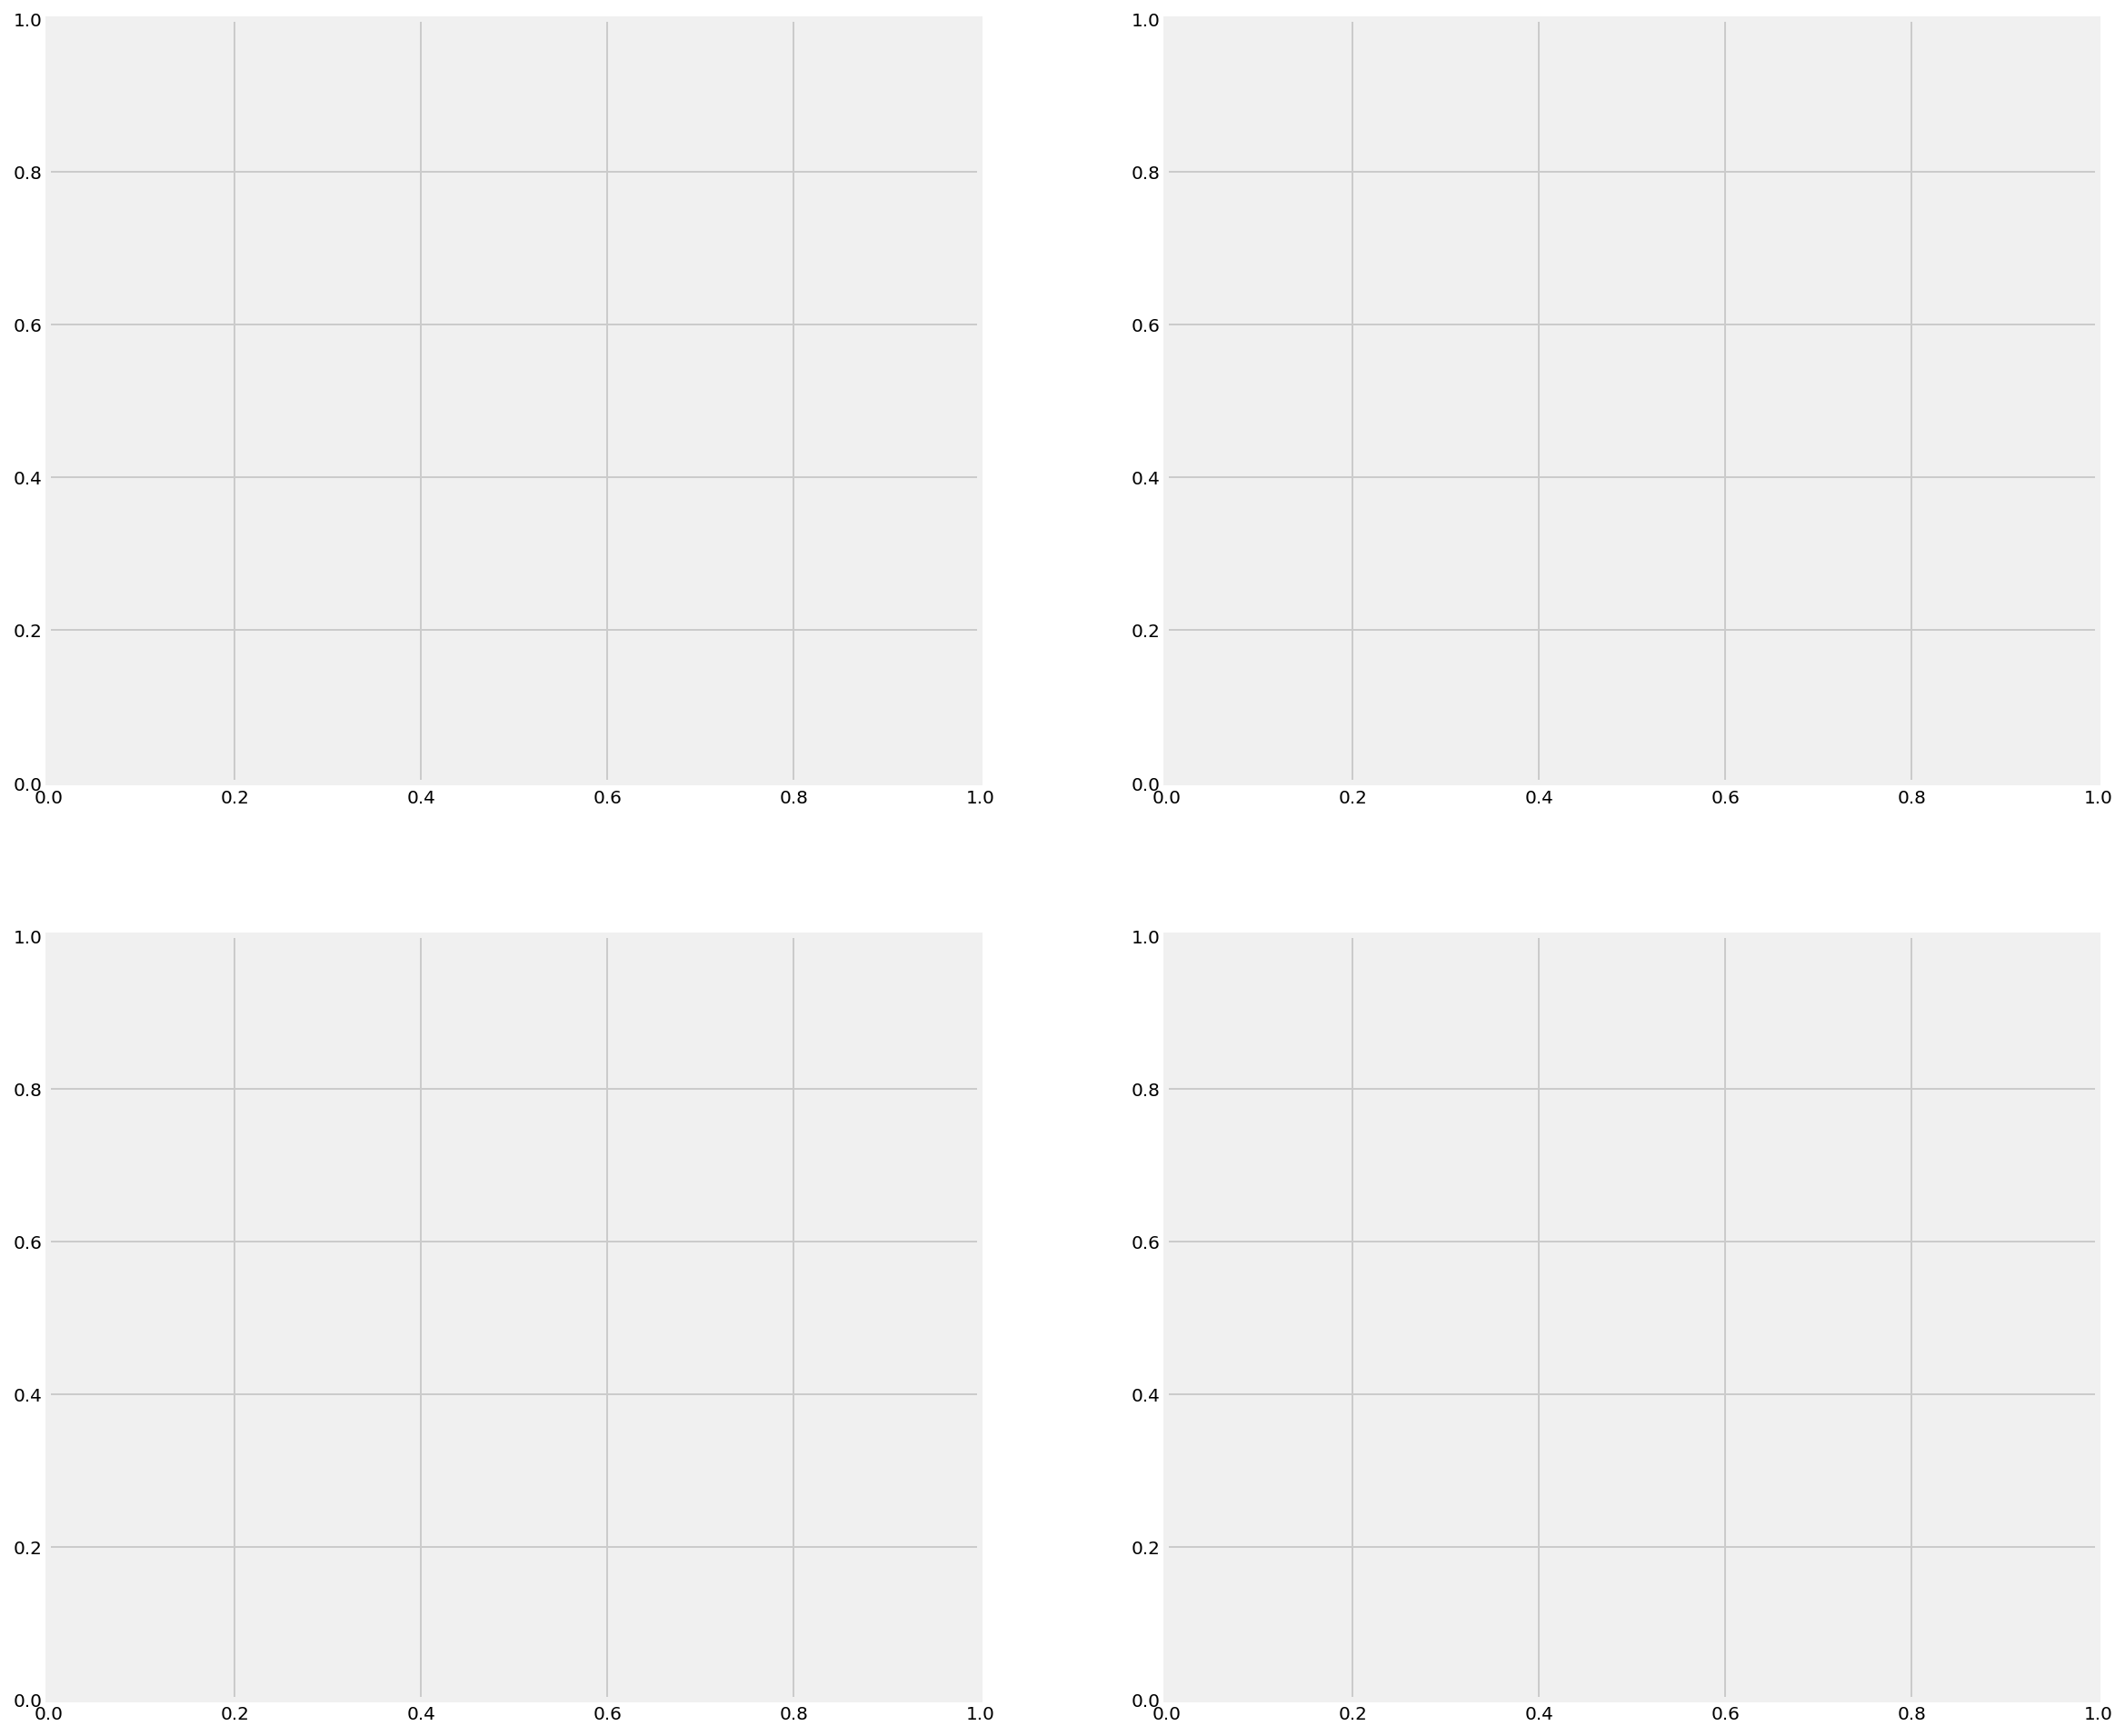

In [27]:
compare_scatter(df, features_list)

In [ ]:
compare_clusters(df,'avg_d', 'density_bus_area',
                n_clusters_kmeans = 3,
                eps_dbscan = 10, min_samples_dbscan = 5)

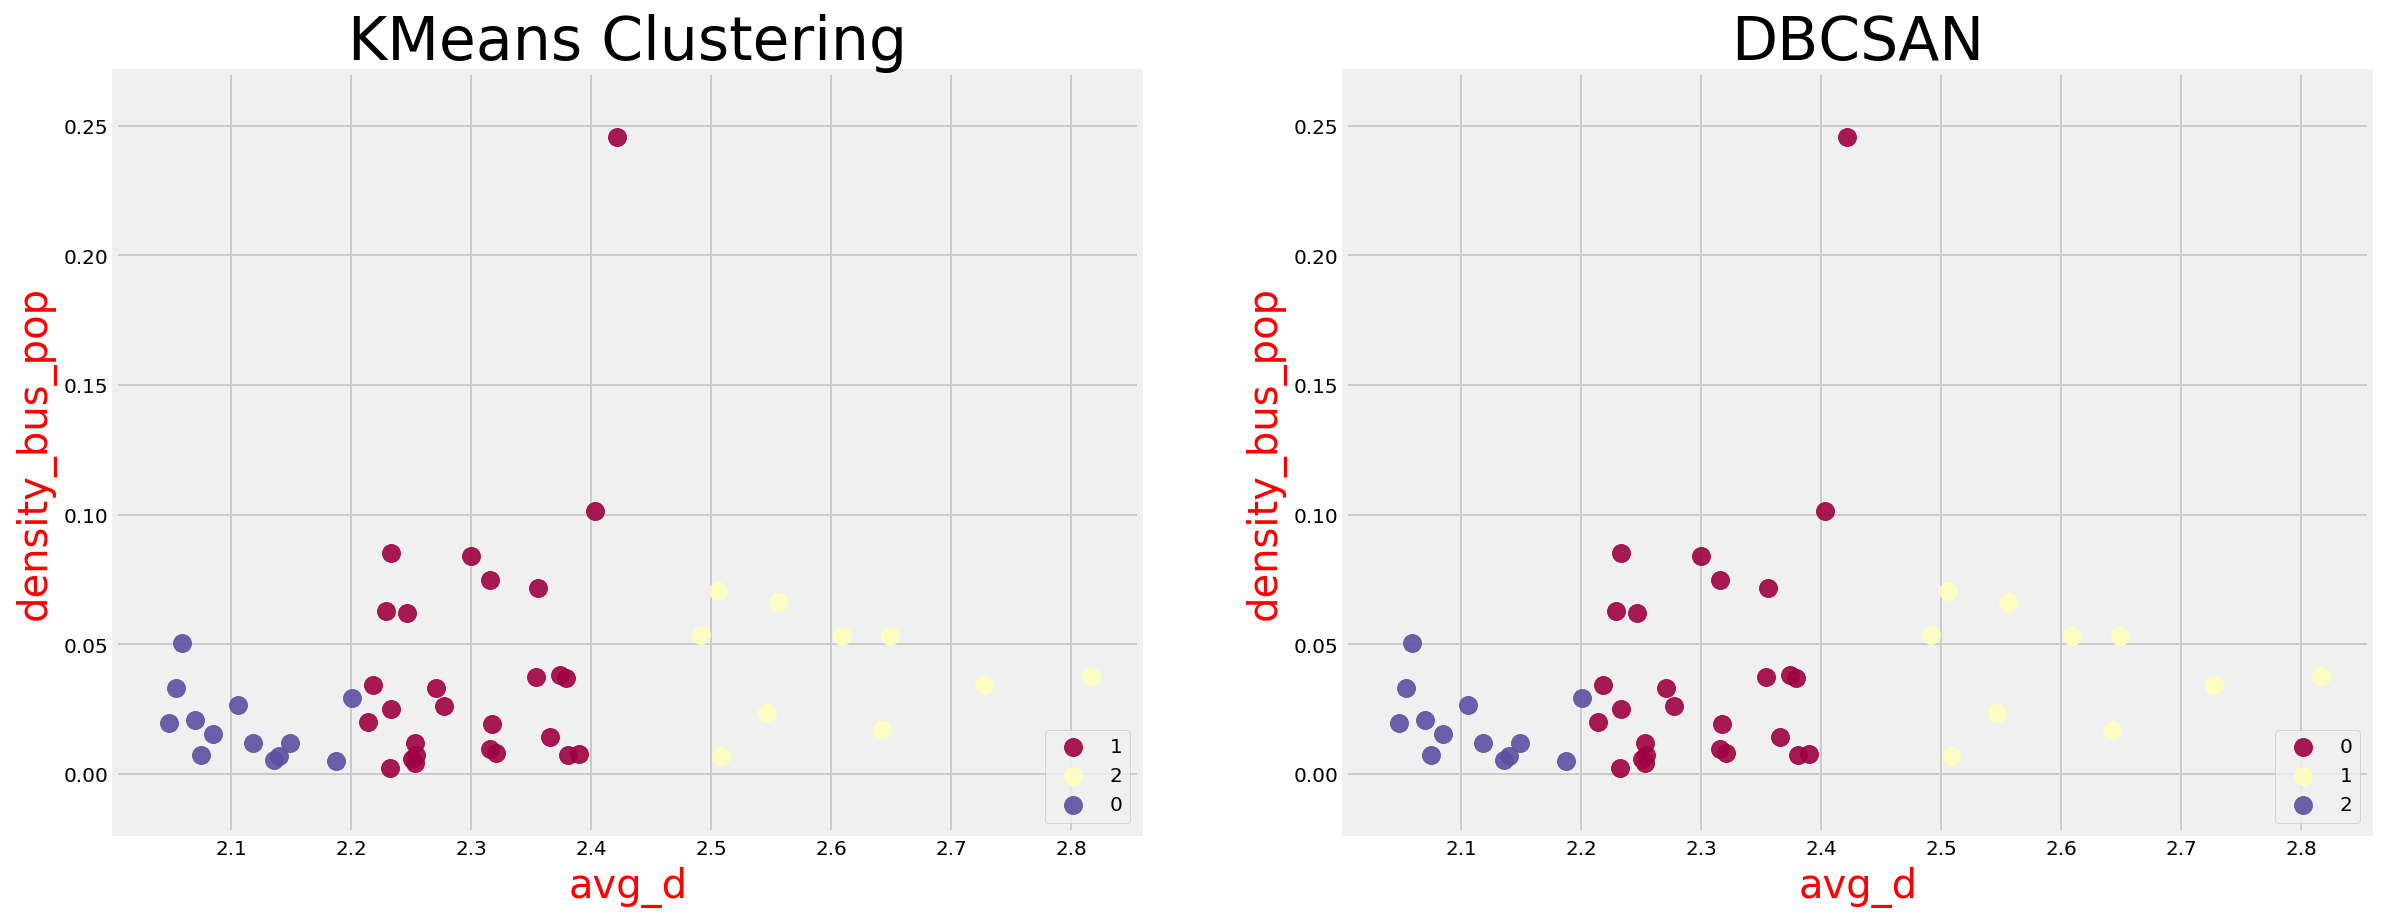

In [6]:
compare_clusters(df,'avg_d', 'density_bus_pop')

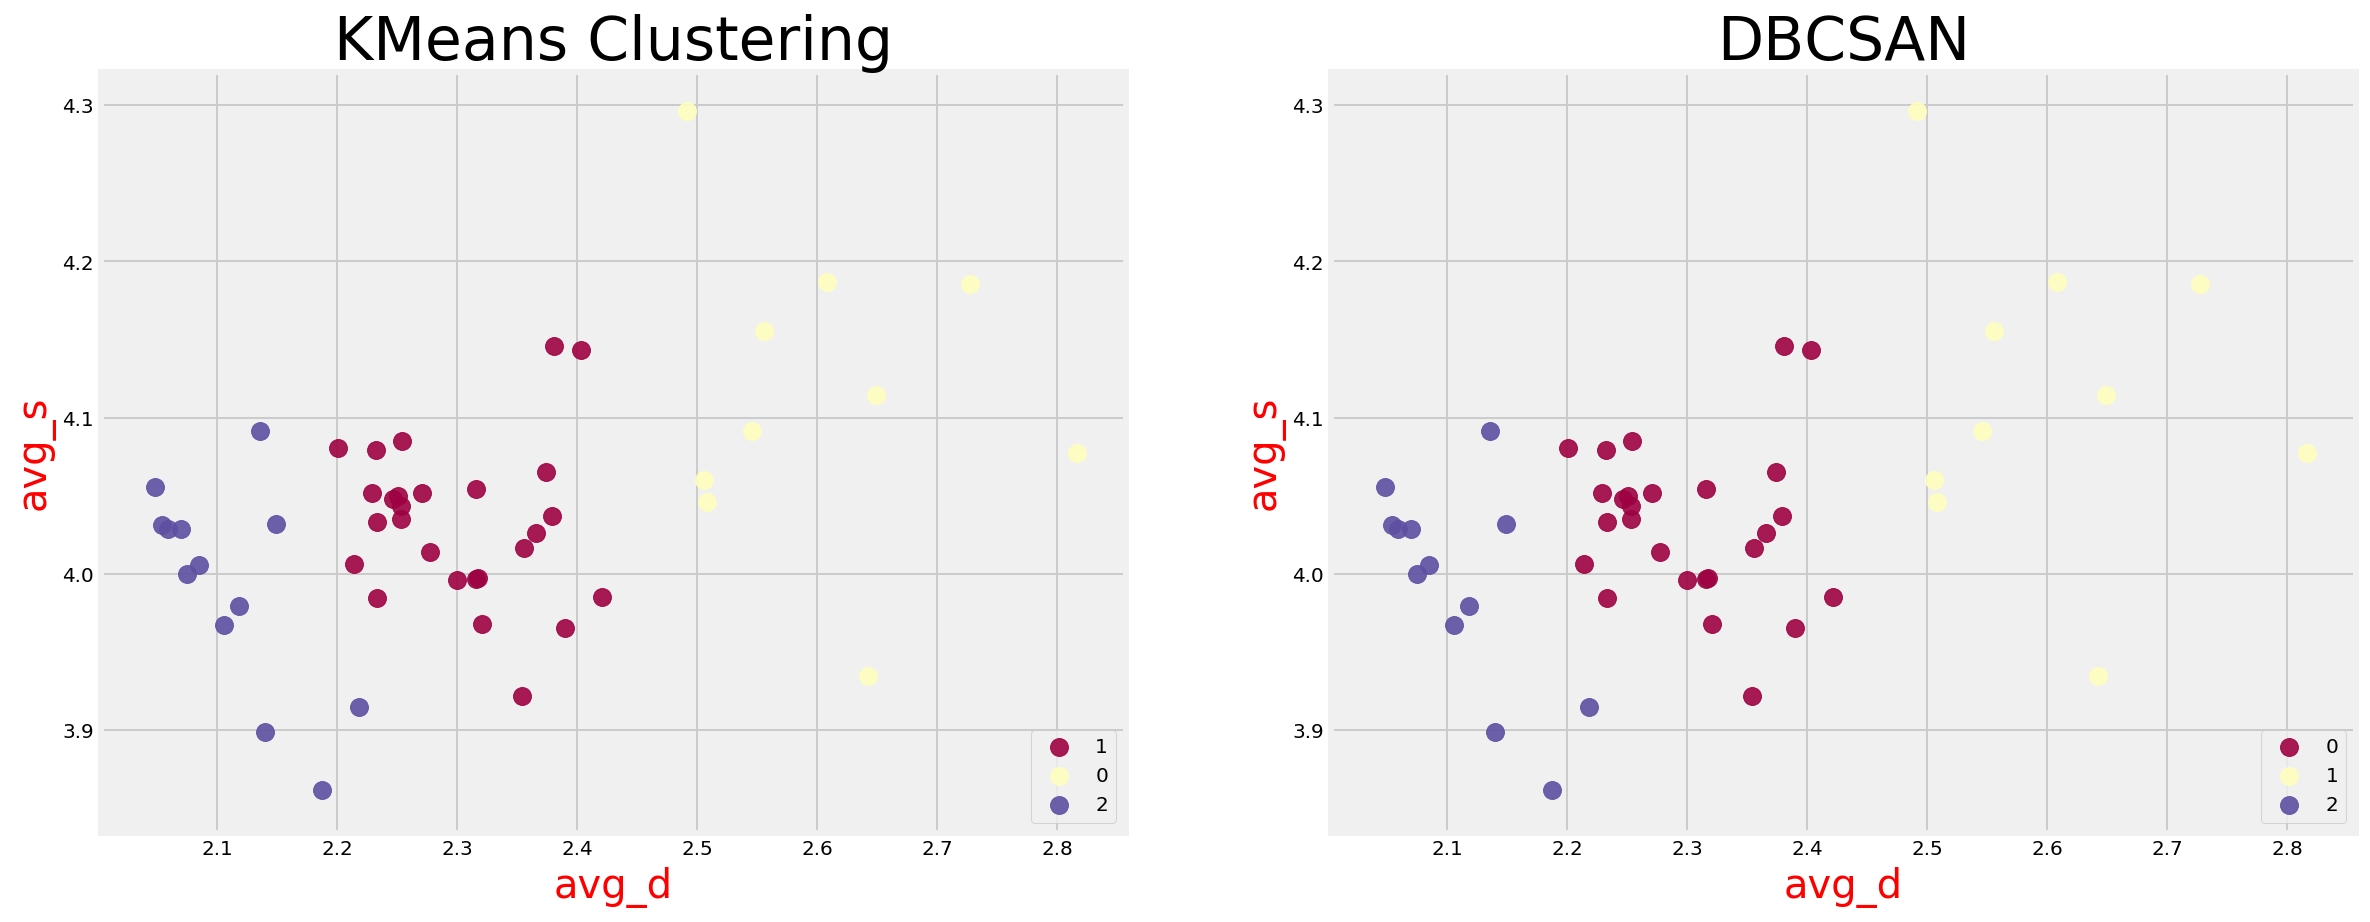

In [7]:
compare_clusters(df,'avg_d', 'avg_s')

_The KMeans Clustering in this graph seems to have some promising conclusions. Next step will be apply those classes to the original data to see if there is any signal from those clusters concerning affluency._

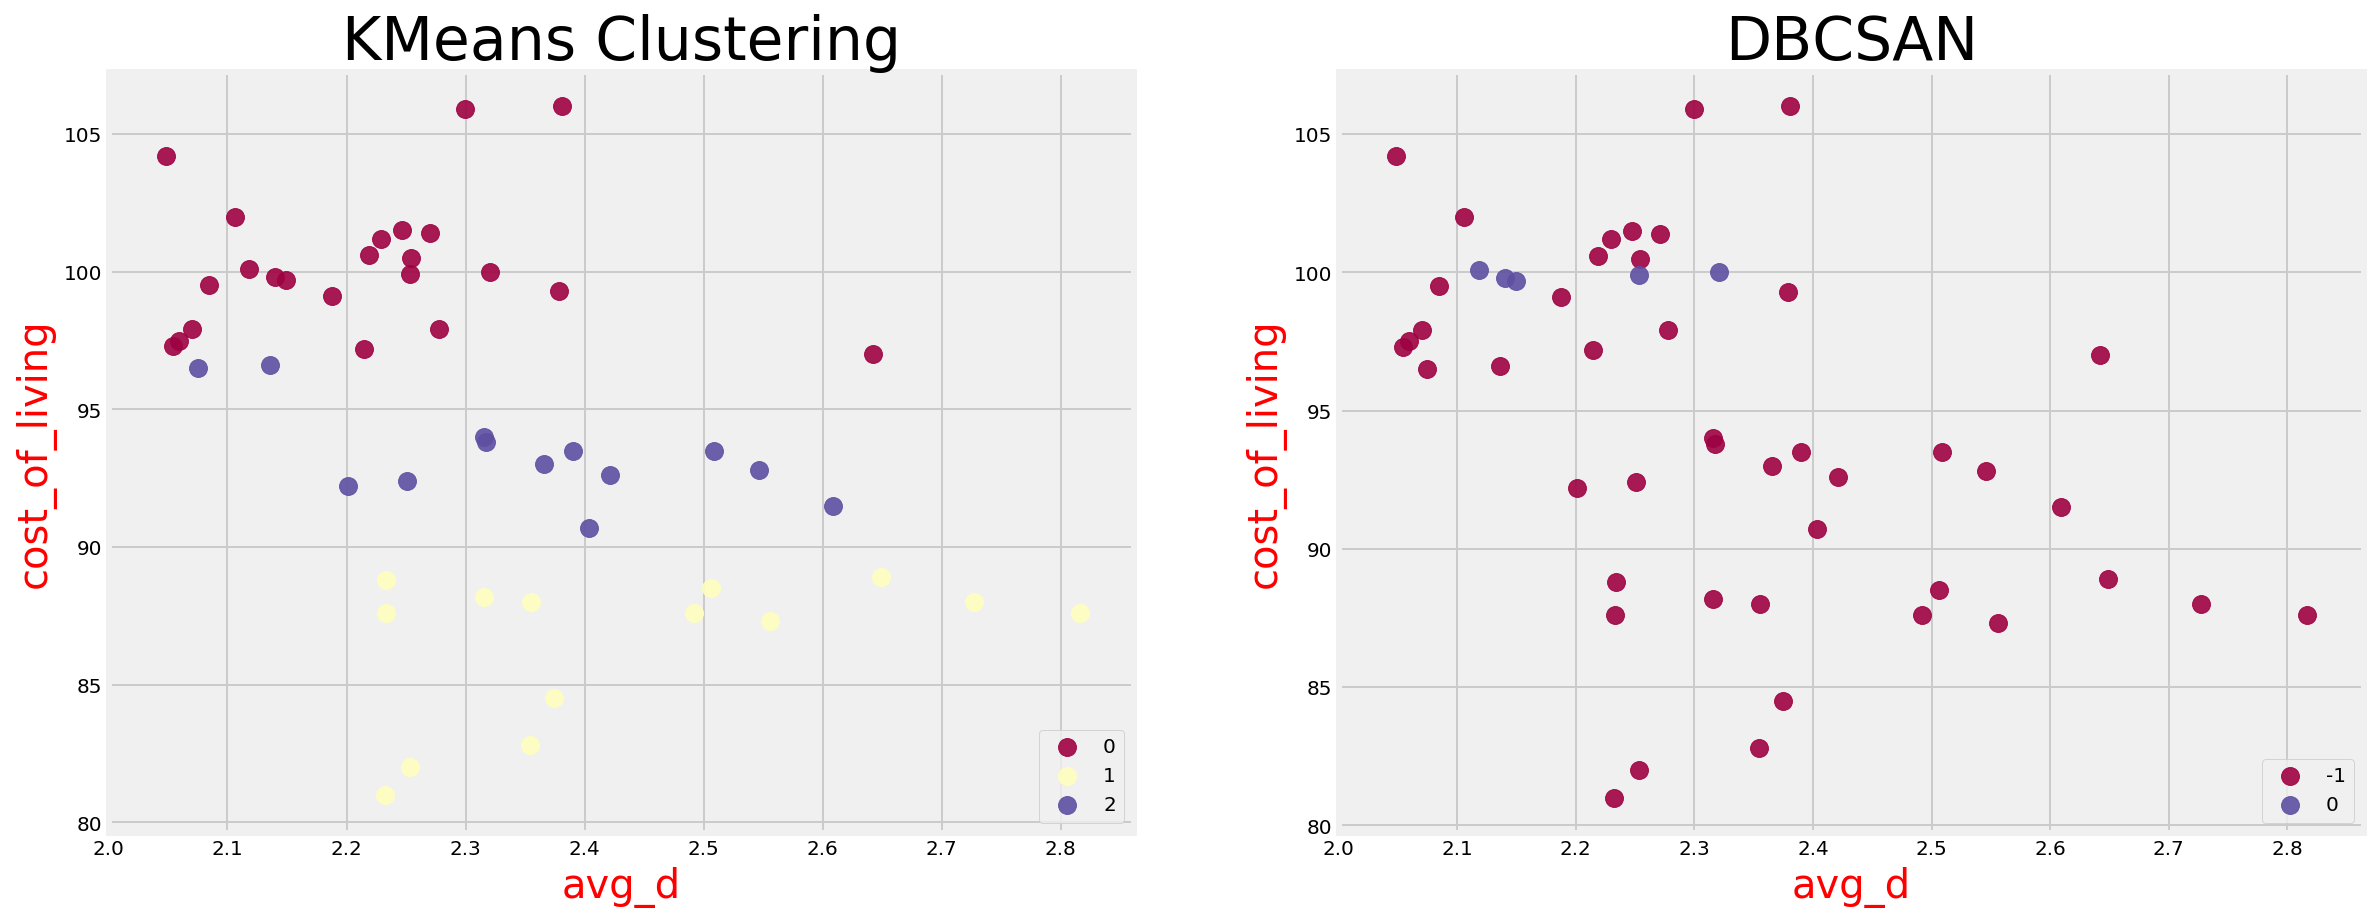

In [8]:
compare_clusters(df,'avg_d', 'cost_of_living')

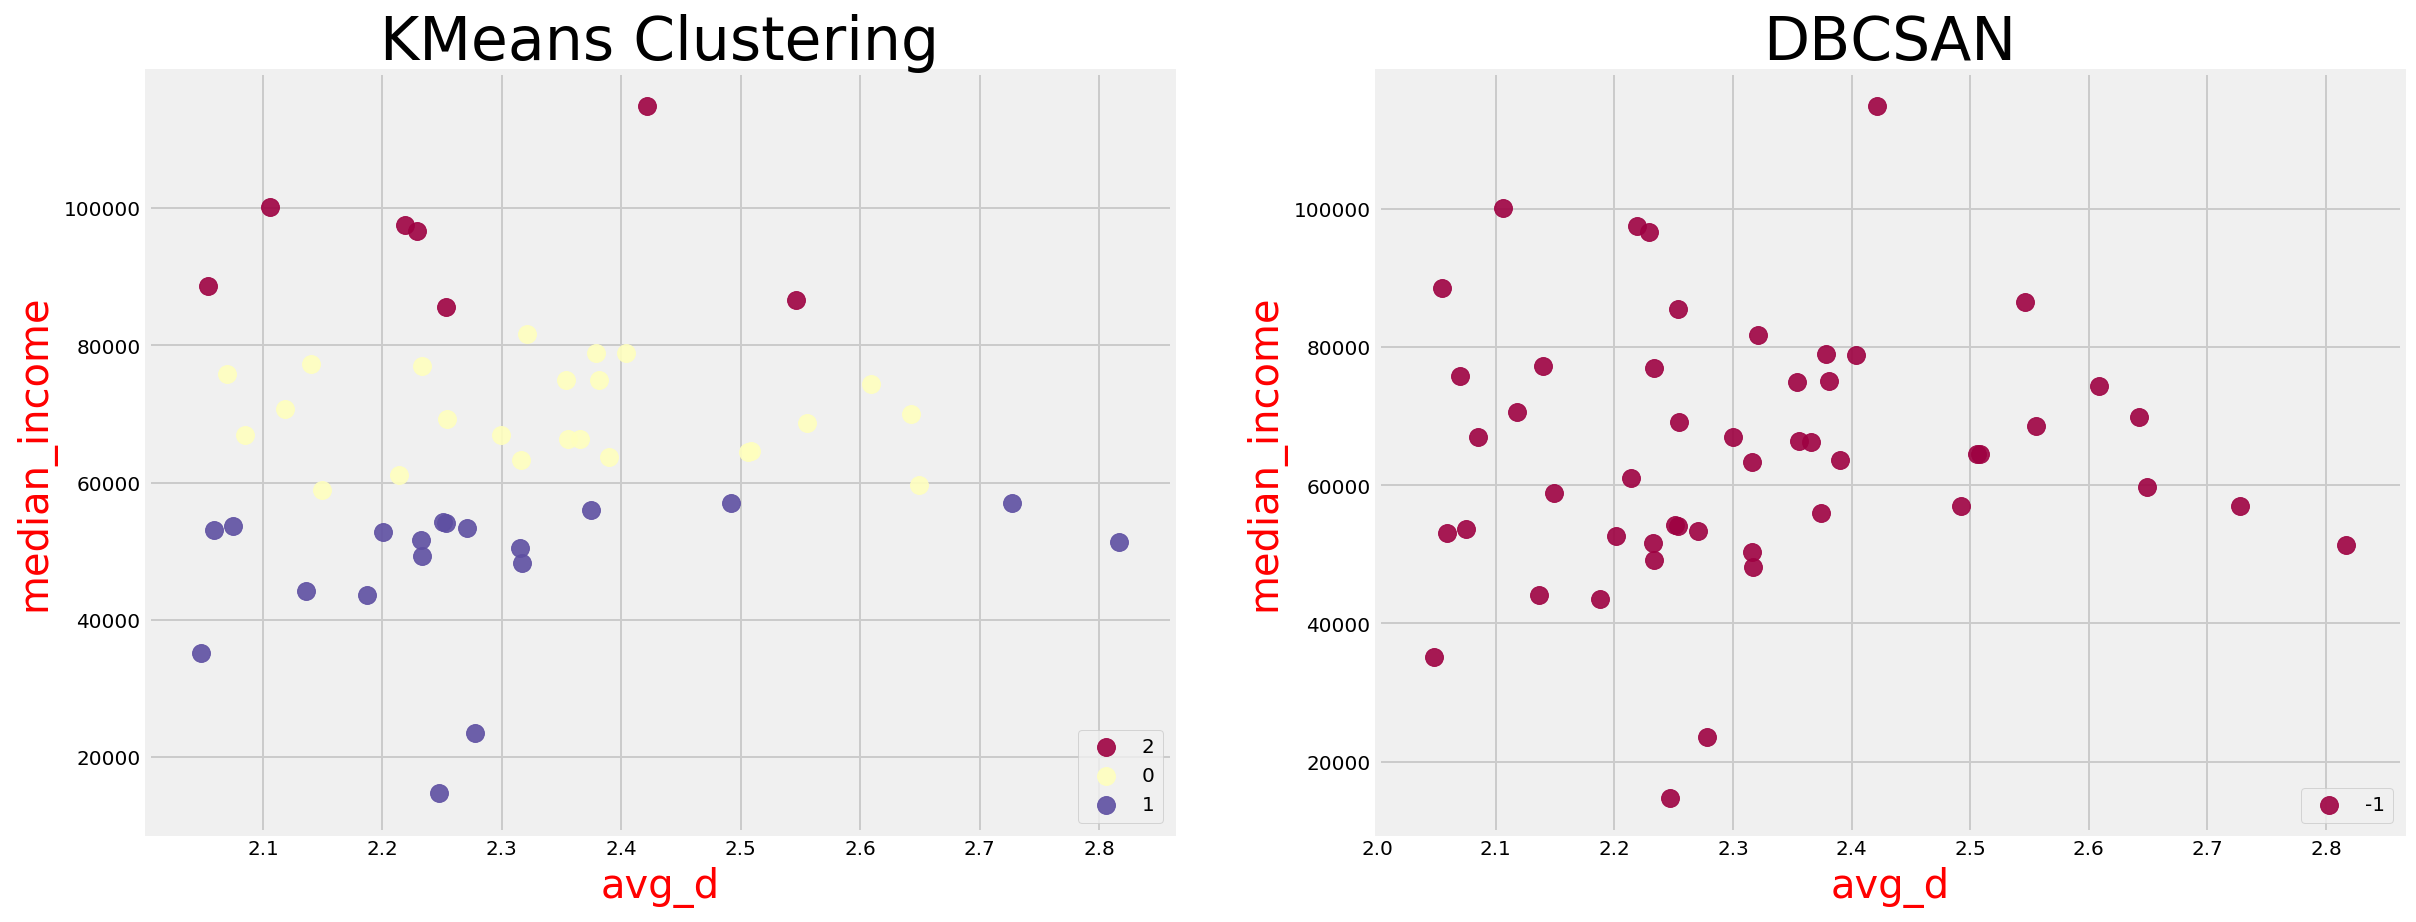

In [9]:
compare_clusters(df,'avg_d', 'median_income')

In [10]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df.loc[:,('avg_d','avg_s')])
df['kmeans_cluster'] = kmeans.labels_

In [11]:
df.sort_values('kmeans_cluster')

,zipcode,population,cost_of_living,area,median_income,n_business,n_coffee,n_d1,n_d2,n_d3,...,n_s4,n_s4plus,n_s5,n_starbucks,avg_d,density_bus_area,density_bus_pop,avg_s,rev_to_bus,kmeans_cluster
24,53403,26627.0,96.6,9.5,44150.0,147.0,5.0,63.0,42.0,1.0,...,33.0,29.0,85.0,0.0,2.136054,15.473684,0.005521,4.091324,20.707483,0
29,53528,6100.0,97.3,46.8,88600.0,203.0,14.0,84.0,68.0,7.0,...,49.0,22.0,132.0,3.0,2.054187,4.337607,0.033279,4.031157,45.763547,0
34,53714,16475.0,97.5,4.6,53114.0,830.0,75.0,337.0,289.0,22.0,...,255.0,106.0,469.0,8.0,2.059036,180.434783,0.050379,4.028560,62.621687,0
35,53719,31790.0,97.9,10.1,75832.0,658.0,68.0,264.0,231.0,16.0,...,164.0,84.0,410.0,7.0,2.069909,65.148515,0.020698,4.028531,48.656535,0
25,53405,25526.0,96.5,6.5,53652.0,187.0,11.0,81.0,57.0,3.0,...,32.0,34.0,121.0,2.0,2.074866,28.769231,0.007326,4.000000,21.133690,0
22,53225,26611.0,99.1,6.9,43542.0,128.0,7.0,48.0,44.0,0.0,...,24.0,11.0,93.0,1.0,2.187500,18.550725,0.004810,3.861607,23.609375,0
18,53186,34513.0,99.7,12.6,58931.0,409.0,37.0,148.0,150.0,13.0,...,89.0,44.0,276.0,8.0,2.149144,32.460317,0.011851,4.031734,30.102689,0
33,53703,30647.0,104.2,1.8,35129.0,601.0,57.0,238.0,219.0,21.0,...,212.0,91.0,298.0,3.0,2.048253,333.888889,0.019610,4.055741,76.530782,0
13,53129,14476.0,99.5,5.1,66995.0,224.0,18.0,83.0,88.0,4.0,...,57.0,23.0,144.0,5.0,2.084821,43.921569,0.015474,4.005540,30.236607,0
10,53092,21525.0,100.6,20.4,97503.0,741.0,73.0,246.0,285.0,12.0,...,164.0,83.0,494.0,13.0,2.218623,36.323529,0.034425,3.914673,27.856950,0


In [12]:
cluster0 = df[df['kmeans_cluster'] == 0][['kmeans_cluster','zipcode','population','cost_of_living','area','median_income','avg_d','avg_s']]
cluster1 = df[df['kmeans_cluster'] == 1][['kmeans_cluster','zipcode','population','cost_of_living','area','median_income','avg_d','avg_s']]
cluster2 = df[df['kmeans_cluster'] == 2][['kmeans_cluster','zipcode','population','cost_of_living','area','median_income','avg_d','avg_s']]

In [13]:
cluster0.sort_values('avg_d')

,kmeans_cluster,zipcode,population,cost_of_living,area,median_income,avg_d,avg_s
33,0,53703,30647.0,104.2,1.8,35129.0,2.048253,4.055741
29,0,53528,6100.0,97.3,46.8,88600.0,2.054187,4.031157
34,0,53714,16475.0,97.5,4.6,53114.0,2.059036,4.028560
35,0,53719,31790.0,97.9,10.1,75832.0,2.069909,4.028531
25,0,53405,25526.0,96.5,6.5,53652.0,2.074866,4.000000
13,0,53129,14476.0,99.5,5.1,66995.0,2.084821,4.005540
4,0,53045,21522.0,102.0,14.4,100149.0,2.106087,3.967280
15,0,53154,35723.0,100.1,28.5,70660.0,2.118203,3.979462
24,0,53403,26627.0,96.6,9.5,44150.0,2.136054,4.091324
5,0,53051,36695.0,99.8,33.0,77318.0,2.140000,3.898876


In [14]:
cluster1.sort_values('avg_d')

,kmeans_cluster,zipcode,population,cost_of_living,area,median_income,avg_d,avg_s
27,1,53522,1135.0,87.6,38.7,57021.0,2.491803,4.296053
7,1,53065,2379.0,88.5,44.7,64488.0,2.505952,4.060311
39,1,54130,26290.0,93.5,79.8,64569.0,2.508475,4.046154
11,1,53119,5519.0,92.8,38.6,86573.0,2.546154,4.091146
6,1,53057,1628.0,87.3,33.0,68643.0,2.555556,4.155405
31,1,53561,1727.0,91.5,36.1,74355.0,2.608696,4.186508
37,1,54025,7327.0,97.0,48.6,69939.0,2.642276,3.934343
2,1,53034,1769.0,88.9,8.3,59674.0,2.648936,4.114504
9,1,53091,1927.0,88.0,25.8,56967.0,2.727273,4.185393
45,1,54466,2886.0,87.6,303.9,51361.0,2.816514,4.077419


In [15]:
cluster2.sort_values('avg_d')

,kmeans_cluster,zipcode,population,cost_of_living,area,median_income,avg_d,avg_s
48,2,54720,7467.0,92.2,4.9,52714.0,2.200913,4.080696
26,2,53406,26625.0,97.2,16.6,61046.0,2.214286,4.006046
0,2,53018,8065.0,101.2,11.5,96683.0,2.229249,4.051769
36,2,53916,22874.0,81.0,100.5,51572.0,2.232143,4.079268
44,2,54423,2410.0,87.6,53.4,76996.0,2.233333,3.984694
32,2,53585,2317.0,88.8,27.3,49227.0,2.233503,4.033113
23,2,53233,16012.0,101.5,1.7,14735.0,2.246976,4.048019
47,2,54701,41287.0,92.4,85.9,54213.0,2.251029,4.049724
19,2,53189,26587.0,99.9,47.4,85575.0,2.253205,4.035197
42,2,54235,17046.0,82.0,192.2,54141.0,2.253521,4.043689
